### 逻辑回归解决多分类问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
path='ex3data1.mat'
data=sio.loadmat(path)

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(5000, 400)),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], shape=(5000, 1), dtype=uint8)}

In [3]:
raw_X=data['X']
raw_y=data['y']
print(raw_X.shape,raw_y.shape)#X是图片，有5000个图片，400是把图片拉直了

(5000, 400) (5000, 1)


In [4]:
def plot_an_image(X):
    pick_one=np.random.randint(5000)
    image=X[pick_one,:]
    fig,ax=plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')

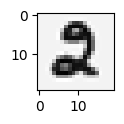

In [10]:
plot_an_image(raw_X)

In [5]:
def plot_images(X):
    sample_index=np.random.choice(len(X),100)
    images=X[sample_index,:]

    fig,ax=plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)#共享横纵坐标
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10*r+c].reshape(20,20).T,cmap='gray_r')

    plt.xticks([])
    plt.yticks([])#去除坐标轴
    plt.show()

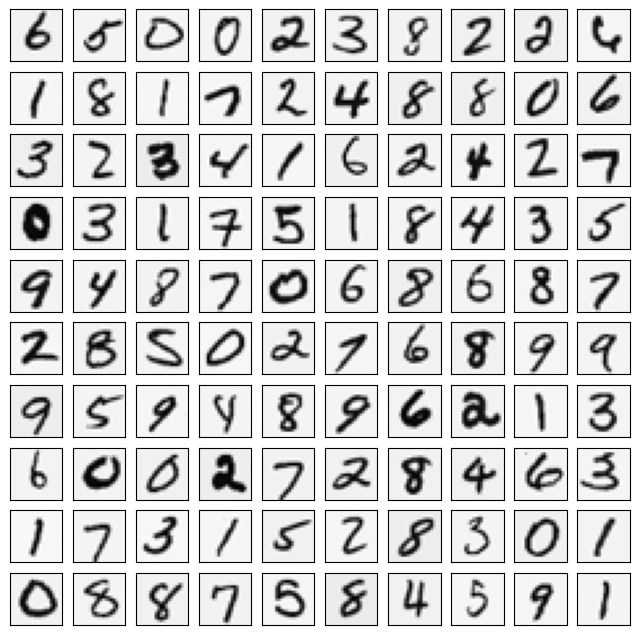

In [13]:
plot_images(raw_X)

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def costFunction(theta,X,y,lamda):
    A=sigmoid(X@theta)
    first=y*np.log(A)
    second=(1-y)*np.log(1-A)
    reg=theta[1:]@theta[1:]*(lamda/2/len(X))
    return -np.sum(first+second)/len(X)+reg

In [14]:
def gradientDescent(theta,X,y,lamda):
    reg=theta[1:]*lamda/len(X)
    reg=np.insert(reg,0,values=0,axis=0)

    first=(X.T@(sigmoid(X@theta)-y))/len(X)
    return first+reg

In [9]:
X=np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [10]:
y=raw_y.flatten()
y.shape

(5000,)

In [22]:
from scipy.optimize import minimize

def one_vs_all(X,y,lamda,K):
    n=X.shape[1]
    theta_all=np.zeros((K,n))

    for i in range(1,K+1):
        theta_i=np.zeros(n,)

        res=minimize(fun=costFunction,
                    x0=theta_i,
                    args=(X,y==i,lamda),
                    method='TNC',
                    jac=gradientDescent)
        theta_all[i-1,:]=res.x
    return theta_all

In [23]:
lamda=1
K=10
theta_final=one_vs_all(X,y,lamda,K)

In [24]:
theta_final

array([[-2.38247766e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30451454e-03, -7.69406454e-10,  0.00000000e+00],
       [-3.18454237e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45883577e-03, -5.08355657e-04,  0.00000000e+00],
       [-4.79529784e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86829074e-05, -2.47557796e-07,  0.00000000e+00],
       ...,
       [-7.98561295e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96394056e-05,  7.22686346e-06,  0.00000000e+00],
       [-4.57190327e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33548134e-03,  9.98336717e-05,  0.00000000e+00],
       [-5.40486432e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16607612e-04,  7.87779937e-06,  0.00000000e+00]],
      shape=(10, 401))

In [20]:
def predict(X,theta_final):
    h=sigmoid(X@theta_final.T)
    h_argmax=np.argmax(h,axis=1)#沿着列比较
    return h_argmax+1

In [25]:
y_pred=predict(X,theta_final)
acc=np.mean(y_pred==y)
acc

np.float64(0.9446)